# Linear Regression
---

Let's first import the required packages:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

Let's define the independent variable:

In [2]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

ERROR! Session/line number was not unique in database. History logging moved to new session 631


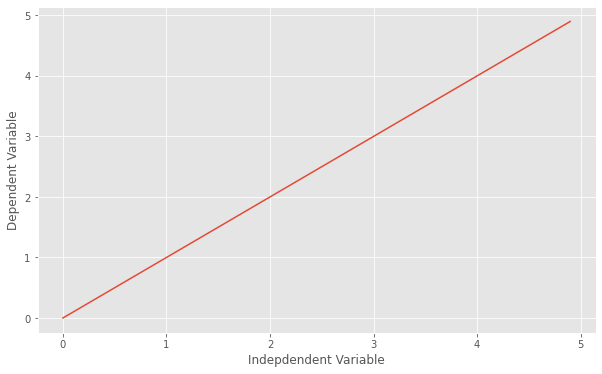

In [3]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<a id="ref2"></a>
<h1>Linear Regression with TensorFlow</h1>

A simple example of a linear function can help us understand the basic mechanism behind TensorFlow.

For the first part we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. 


In [4]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-07-06 05:00:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-07-06 05:00:36 (1.62 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [5]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:

In [6]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

First, we initialize the variables <b>a</b> and <b>b</b>, with any random guess, and then we define the linear function:

In [7]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use <b>tf.reduce_mean()</b>. This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [9]:
loss = tf.reduce_mean(tf.square(y - train_y))

Then, we define the optimizer method. The gradient Descent optimizer takes in parameter: learning rate, which corresponds to the speed with which the optimizer should learn; there are pros and cons for increasing the learning-rate parameter, with a high learning rate the training model converges quickly, but there is a risk that a high learning rate causes instability and the model will not converge. <b>Please feel free to make changes to learning parameter and check its effect</b>. On the other hand decreasing the learning rate might reduce the convergence speed, but it would increase the chance of converging to a solution. You should note that the solution might not be a global optimal solution as there is a chance that the optimizer will get stuck in a local optimal solution. Please review other material for further information on the optimization. Here we will use a simple gradient descent with a learning rate of 0.05: <br>  

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

Now we will define the training method of our graph, what method we will use for minimize the loss? We will use the <b>.minimize()</b> which will minimize the error function of our optimizer, resulting in a better model.

In [11]:
train = optimizer.minimize(loss)

Don't forget to initialize the variables before executing a graph:

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Now we are ready to start the optimization and run the graph:

In [13]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.594 77.07106 46.110275
5 1891.7205 58.84462 47.59573
10 1762.7241 57.65104 53.019833
15 1653.5897 56.36652 58.023922
20 1559.0441 55.172844 62.68204
25 1477.1372 54.061794 67.01765
30 1406.179 53.027664 71.05309
35 1344.7057 52.065136 74.809135
40 1291.4506 51.169243 78.30512
45 1245.3145 50.33538 81.559074
50 1205.3451 49.55925 84.58775
55 1170.7189 48.83685 87.40674
60 1140.7214 48.164467 90.03055
65 1114.734 47.53864 92.472694
70 1092.2203 46.956135 94.74576
75 1072.7163 46.413967 96.86146
80 1055.8193 45.909332 98.83067
85 1041.1812 45.439632 100.66355
90 1028.4996 45.002453 102.36953
95 1017.5135 44.595547 103.95739


Lets plot the loss values to see how it has changed during the training:

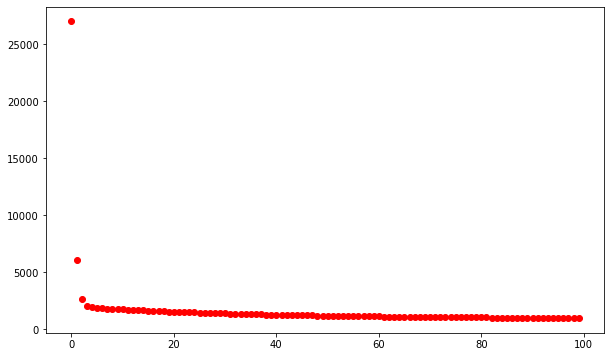

In [14]:
plt.plot(loss_values, 'ro')

Lets visualize how the coefficient and intercept of line has changed to fit the data:

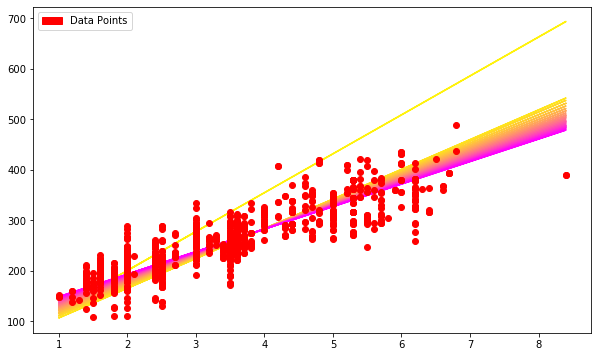

In [15]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

## Thanks for reading :)
Created by [Saeed Aghabozorgi](https://www.linkedin.com/in/saeedaghabozorgi/) and modified by [Tarun Kamboj](https://www.linkedin.com/in/kambojtarun/).